# KMeans clustering image segmentation

In [16]:
import numpy as np
import cv2 as cv

In [17]:
#img = cv.imread('IMG_5928.jpeg')
img = cv.imread('me.jpeg')
Z = img.reshape((-1,3))


In [18]:
# convert to np.float32
Z = np.float32(Z)


In [19]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)


In [20]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
#cv.imshow('res2',res2)


In [21]:
# cv.imwrite('lesley6.jpg', res2)

In [22]:
# cv.waitKey(1)

In [23]:
# cv.destroyWindow('res2')


In [24]:
center

array([[ 58,  73,  92],
       [211, 240, 251],
       [140, 162, 171],
       [ 93, 116, 136],
       [ 27,  30,  33],
       [115, 142, 222]], dtype=uint8)

# GMM (Gaussian Micture Model) for image segementation
Unsupervised algo with "elbow" technique for choosing optimal number of clusters.

In [25]:
from sklearn.mixture import GaussianMixture as GMM

In [34]:
# img = cv.imread('IMG_5928.jpeg')
img = cv.imread('me.jpeg')

Z = img.reshape((-1,3))

In [35]:
Z

array([[39, 37, 27],
       [40, 38, 28],
       [42, 40, 30],
       ...,
       [34, 34, 34],
       [32, 32, 32],
       [31, 31, 31]], dtype=uint8)

In [36]:
gmm_model = GMM(6, covariance_type='full').fit(Z)

In [42]:
bic_values = gmm_model.bic(Z)
print(bic_values)

18239021.881381795


In [38]:
n_components = np.arange(1,10)

gmm_models = [GMM(n, covariance_type='full').fit(Z) for n in n_components]

Text(0.5, 0, 'n_components')

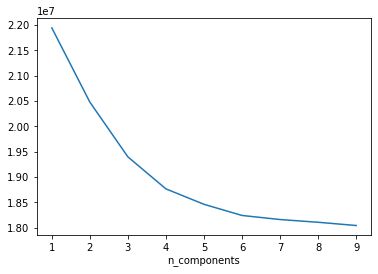

In [43]:
from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(Z) for m in gmm_models], label='BIC')
plt.xlabel('n_components')

In [45]:
gmm_labels = gmm_model.predict(Z)

In [49]:
original_shape = img.shape
print(original_shape)
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

(1024, 768, 3)


In [50]:
cv.imwrite('img5928_8.jpeg', segmented)

True

# Applying available filters to images to detect certain patterns
This is used for generating features in images, where each filter detects a certain component or texture. Later on, a combination of these features can serve in a Machine Learning model to describe the regions we are intested in. However, this latter is only necessary if the filter itself is not sufficient enough for identifying what we are looking for.

## Prepare image

In [51]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd

In [52]:
# img = cv2.imread('sandstone.jpeg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img2 = img.reshape(-1)

# img_LP = cv2.imread('IMG_5928.jpeg')
# img_LP = cv2.cvtColor(img_LP, cv2.COLOR_BGR2GRAY)
# img_LP2 = img_LP.reshape(-1)

img_LP = cv2.imread('me.jpeg')
img_LP = cv2.cvtColor(img_LP, cv2.COLOR_BGR2GRAY)
img_LP2 = img_LP.reshape(-1)


df = pd.DataFrame()
# df['Original Image'] = img2 #create a df with 1 column that has a row for each pixel 333*500=166500 rows with a grayscale value
df['Original Image'] = img_LP2 #create a df with 1 column that has a row for each pixel 4032*3024 rows with a grayscale value

In [53]:
# img.shape
img_LP.shape

(1024, 768)

In [54]:
df

,Original Image
0,34
1,35
2,37
3,38
4,37
...,...
786427,33
786428,34
786429,34
786430,32


In [55]:
#show the image in grayscale
# cv2.imshow('img', img)
# cv2.imshow('img_LP', img_LP)

In [56]:
# cv2.waitKey(1)

In [57]:
# cv2.destroyAllWindows()

## Apply an Entropy filter that is good at detecting disorder
This filter is often applied for detecting very subtle variations in local gray scales distributions.

In [58]:
# entropy_img = entropy(img, disk(1)) #disk is the Euclidean distance in which grayscale variations will be looked for
entropy_img = entropy(img_LP, disk(1)) #disk is the Euclidean distance in which grayscale variations will be looked for

entropy1 = entropy_img.reshape(-1)
df['Entropy'] = entropy1 # here we add it as a feature to the df
#print(df)


In [59]:
# cv2.imshow('entropy_img', entropy_img)

In [60]:
# cv2.waitKey(1)

In [61]:
# cv2.destroyAllWindows()

## Apply Gaussian filter
Also used for blur and reducing noise

In [62]:
from scipy import ndimage as nd

gaussian_img = nd.gaussian_filter(img_LP, sigma=3) #the larger the sigma, the blurrier it gets

gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1


In [63]:
# cv2.imshow('gaussian_img', gaussian_img)

In [64]:
# cv2.waitKey(1)

In [65]:
# cv2.destroyAllWindows()

## Apply Sobel filter
Works good on edges

In [66]:
from skimage.filters import sobel

sobel_img = sobel(img_LP)

sobel1 = sobel_img.reshape(-1)
df['Sobel'] = sobel1
#print(df.head())


In [67]:
# cv2.imshow('sobel_img', sobel_img)

In [68]:
# cv.waitKey(1)

In [69]:
# cv2.destroyAllWindows()

In [70]:
df

,Original Image,Entropy,Gaussian s3,Sobel
0,34,0.918296,33,0.003922
1,35,2.000000,33,0.007904
2,37,1.500000,33,0.006932
3,38,0.811278,33,0.002192
4,37,1.500000,33,0.004902
...,...,...,...,...
786427,33,1.500000,31,0.006201
786428,34,1.000000,31,0.003922
786429,34,1.500000,31,0.004384
786430,32,2.000000,31,0.006577


## Gabor filter
For image processing and computer vision, Gabor filters are generally used in texture analysis, edge detection, feature extraction, etc. Gabor filters are special classes of bandpass filters, i.e., they allow a certain ‘band’ of frequencies and reject the others.


Input parameters:
* ksize Size of the filter returned.
* sigma Standard deviation of the gaussian envelope.
* theta Orientation of the normal to the parallel stripes of a Gabor function.
* lambda Wavelength of the sinusoidal factor.
* gamma Spatial aspect ratio.
* psi Phase offset.
* ktype Type of filter coefficients. It can be CV_32F or CV_64F.Indicates the type and range of values that each pixel in the Gabor kernel can hold. Basically float32 or float64

In [71]:
ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 1 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/1  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /4  #1/4 works best for angled. 
gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 

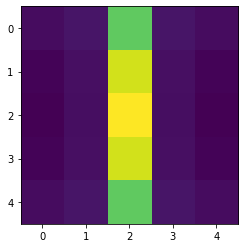

In [72]:
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

In [73]:
img = cv2.imread('IMG_5928.jpeg')
#img = cv2.imread('me.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (40, 40))                    # Resize image
# cv2.imshow('Kernel', kernel_resized)
# cv2.imshow('Original Img.', img)
# cv2.imshow('Filtered', fimg)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

In [74]:
# cv2.waitKey(5000)

## Create a range of Gabor filters 
for a range of thetas, sigmas etc - this can be used as features in a ML modelimg = cv2.imread('images/synthetic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

In [75]:
img = cv2.imread('IMG_5928.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

In [76]:
#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

In [77]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #generate Label Gabor columns as Gabor1, Gabor2, etc.
                ksize=5
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

# A (traditional) Machine Learning model for Image Segmentation

Workflow:
* image: divide it in training and testing
* create features (Gabor, entropy, Sobel filter, etc)
* apply Random Forest for correct segmentation
* validate it on the test data
* which features are relevant?
* save the optimal model 
* segment!

## Import data and create features

In [78]:
# load the data
img = cv2.imread('Train_images/Sandstone_Versa0000.tif') #just one image for now
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

In [79]:
#create empty dataframe where all the features will be added to
df = pd.DataFrame()

In [80]:
#add original pixel data
img_reshape = img.reshape(-1)
df['orginal pixel data'] = img_reshape
df.head()

,orginal pixel data
0,0
1,0
2,0
3,0
4,0


## Create features

In [81]:
#add features - Gabor (see above)
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #generate Label Gabor columns as Gabor1, Gabor2, etc.
                ksize=5
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
df

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Canny edge - edge detector
edges = cv2.Canny(img, 100,200)
edges1 = edges.reshape(-1)
df['Canny edge'] = edges1
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny edge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Roberts edge
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_roberts1= edge_roberts.reshape(-1)
df['Roberts edge'] = edge_roberts1
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny edge,Roberts edge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [84]:
#Sobel edge

edge_sobel = sobel(img)
edge_sobel1= edge_sobel.reshape(-1)
df['Sobel edge'] = edge_sobel1
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny edge,Roberts edge,Sobel edge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [85]:
#Scharr edge

edge_scharr = scharr(img)
edge_scharr1= edge_scharr.reshape(-1)
df['Scharr edge'] = edge_scharr1
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny edge,Roberts edge,Sobel edge,Scharr edge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [86]:
#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

In [87]:
#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

In [88]:
#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

In [89]:
#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

In [90]:
#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

In [91]:
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny edge,Roberts edge,Sobel edge,Scharr edge,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [92]:
# add the label column with the ground truth
labeled_img = cv2.imread('Train_masks/Sandstone_Versa0000.tif')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)

df['label'] = labeled_img1
df

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Canny edge,Roberts edge,Sobel edge,Scharr edge,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29


## Train a model

In [93]:
#split train-test data
Y = df['label'].values

In [94]:
X = df.drop(['label'], axis=1)
X[:100]

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny edge,Roberts edge,Sobel edge,Scharr edge,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.4, random_state=42)

In [96]:
train_X.shape

(611942, 42)

In [97]:
#Random Forest - fit
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)

model.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [98]:
#predict
pred_Y = model.predict(test_X)
pred_Y

array([29, 29, 29, ..., 76, 76, 29], dtype=uint8)

In [99]:
#measure accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(test_Y, pred_Y))

Accuracy =  0.981390423617886


## Feature ranking

In [100]:
importances = list(model.feature_importances_)

In [101]:
feature_list = list(X.columns)
features_df = pd.Series(importances, index=feature_list).sort_values(ascending=False)

In [102]:
features_df

Gaussian s3           2.681407e-01
Gabor4                1.628445e-01
Median s3             1.126064e-01
orginal pixel data    1.033600e-01
Gabor23               8.677214e-02
Gabor24               7.598137e-02
Gabor29               6.906012e-02
Gaussian s7           1.993014e-02
Gabor31               1.031583e-02
Gabor16               1.010655e-02
Gabor3                9.954758e-03
Gabor15               9.089656e-03
Prewitt               8.219538e-03
Gabor21               7.829678e-03
Scharr edge           7.699032e-03
Sobel edge            6.794893e-03
Gabor32               6.056883e-03
Gabor5                5.516356e-03
Roberts edge          4.134461e-03
Gabor6                3.968227e-03
Gabor8                2.635316e-03
Variance s3           2.305668e-03
Gabor7                2.159817e-03
Gabor30               1.847412e-03
Gabor22               1.663584e-03
Canny edge            8.878720e-04
Gabor12               5.459134e-05
Gabor20               3.089579e-05
Gabor11             

## Predict on new images

In [103]:
#save the model for future use

import pickle

filename = 'sandstone model'
pickle.dump(model, open(filename, 'wb')) #in write mode

In [104]:
#load the model
loaded_model = pickle.load(open('sandstone model', 'rb'))

In [105]:
#try on original image X
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

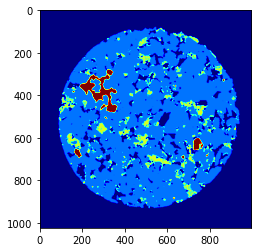

In [106]:
from matplotlib import pyplot as plt
plt.imshow(segmented, cmap='jet')
plt.imsave('segmented_sandstone.jpg', segmented, cmap='jet')

In [107]:
# reshape any images and put in dataframe together with features
def feature_extraction(img):
    #create a df
    df = pd.DataFrame()
    img_reshape = img.reshape(-1)
    df['orginal pixel data'] = img_reshape
    
    #features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 4. * np.pi
        for sigma in (1, 3):  #Sigma with values of 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                    gabor_label = 'Gabor' + str(num)  #generate Label Gabor columns as Gabor1, Gabor2, etc.
                    ksize=5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                    num += 1  #Increment for gabor column label
                    
    #Canny edge - edge detector
    edges = cv2.Canny(img, 100,200)
    edges1 = edges.reshape(-1)
    df['Canny edge'] = edges1

    #Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1= edge_roberts.reshape(-1)
    df['Roberts edge'] = edge_roberts1

    #Sobel edge
    edge_sobel = sobel(img)
    edge_sobel1= edge_sobel.reshape(-1)
    df['Sobel edge'] = edge_sobel1
    
    #Scharr edge
    edge_scharr = scharr(img)
    edge_scharr1= edge_scharr.reshape(-1)
    df['Scharr edge'] = edge_scharr1

    #PREWITT
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1
    
    #GAUSSIAN with sigma=3
    gaussians3_img = nd.gaussian_filter(img, sigma=3)
    gaussians3_img1 = gaussians3_img.reshape(-1)
    df['Gaussian s3'] = gaussians3_img1
    
    #GAUSSIAN with sigma=7
    gaussians7_img = nd.gaussian_filter(img, sigma=7)
    gaussians7_img1 = gaussians7_img.reshape(-1)
    df['Gaussian s7'] = gaussians7_img1
    
    #MEDIAN with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1
    
    #VARIANCE with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe
    
    return df
    

In [108]:
import glob #for importing all images
import pickle
from matplotlib import pyplot as plt

filename = 'sandstone model'
loaded_model = pickle.load(open(filename, 'rb'))

In [112]:
import tifffile
PATH = 'Train_images/*.tif'

for file in glob.glob(PATH):
    #print(file)
    img1 = cv2.imread(file)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    
    #call the feature function
    X = feature_extraction(img)
    
    #predict the image
    result = loaded_model.predict(X)
    #reshape for saving
    segmented = result.reshape((img.shape))
    #rename
    name = file.split("e_")
    name1 = name[1].split(".")
    #print('Segmented/'+name1[0]+'.jpg')
    # plt.imsave('Segmented/'+name1[0]+'.jpg', segmented, cmap='jet')
    tifffile.imwrite('Segmented/'+ name[1], segmented)

    

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

# The same model but with multiple images as input

## Define function to generate features

In [173]:
def feature_extraction(img):
    #create a df
    df = pd.DataFrame()
    img_reshape = img.reshape(-1)
    df['orginal pixel data'] = img_reshape
    
    
      
    
    #features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 4. * np.pi
        for sigma in (1, 3):  #Sigma with values of 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                    gabor_label = 'Gabor' + str(num)  #generate Label Gabor columns as Gabor1, Gabor2, etc.
                    ksize=5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    #print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                    num += 1  #Increment for gabor column label
                    
    #Canny edge - edge detector
    edges = cv2.Canny(img, 100,200)
    edges1 = edges.reshape(-1)
    df['Canny edge'] = edges1

    #Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1= edge_roberts.reshape(-1)
    df['Roberts edge'] = edge_roberts1

    #Sobel edge
    edge_sobel = sobel(img)
    edge_sobel1= edge_sobel.reshape(-1)
    df['Sobel edge'] = edge_sobel1
    
    #Scharr edge
    edge_scharr = scharr(img)
    edge_scharr1= edge_scharr.reshape(-1)
    df['Scharr edge'] = edge_scharr1

    #PREWITT
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1
    
    #GAUSSIAN with sigma=3
    gaussians3_img = nd.gaussian_filter(img, sigma=3)
    gaussians3_img1 = gaussians3_img.reshape(-1)
    df['Gaussian s3'] = gaussians3_img1
    
    #GAUSSIAN with sigma=7
    gaussians7_img = nd.gaussian_filter(img, sigma=7)
    gaussians7_img1 = gaussians7_img.reshape(-1)
    df['Gaussian s7'] = gaussians7_img1
    
    #MEDIAN with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1
    
    #VARIANCE with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe
    
    return df

## Create df with all training images and features

In [192]:
######################
#read training images#
######################
import os
img_path = 'Train_images/' 
image_dataset = pd.DataFrame() #dataframe to collect all images

for image in os.listdir(img_path): #iterate through each image
    
    df = pd.DataFrame() #temporary df for each image


    if not image.startswith('.'):
        input_img = cv2.imread(img_path + image)
    
    
        if input_img.ndim == 3 and input_img.shape[-1]==3:
            img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        elif input_img.ndim == 2:
            img = input_img
        else:
            raise Exception("Only grayscale or RBG images!")
        
#########################################################
#prepare the df with original pixels and create features#
#########################################################
        df = feature_extraction(img)
        df['image name'] = image



################################################
#append this image's df to the complete df with#
################################################

        
    else:
        continue
    image_dataset = pd.concat([image_dataset, df])

In [193]:
image_dataset.shape

(9179136, 43)

In [194]:
image_dataset.head()

,orginal pixel data,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Canny edge,Roberts edge,Sobel edge,Scharr edge,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3,image name
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,Sandstone_Versa0150.tif
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,Sandstone_Versa0150.tif
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,Sandstone_Versa0150.tif
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,Sandstone_Versa0150.tif
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,Sandstone_Versa0150.tif


## The same for labeled images
But additional column with labels

In [195]:
mask_dataset = pd.DataFrame()

mask_path = 'Train_masks/'

In [196]:
for mask in os.listdir(mask_path): #iterate through each image
    
    df = pd.DataFrame() #temporary df for each image

    if not mask.startswith('.'):
        input_mask = cv2.imread(mask_path + mask)
    
    
        if input_mask.ndim == 3 and input_mask.shape[-1]==3:
            label = cv2.cvtColor(input_mask, cv2.COLOR_BGR2GRAY)
        elif input_mask.ndim == 2:
            label = input_mask
        else:
            raise Exception("Only grayscale or RBG images!")
        
#####################################
#prepare the df with original pixels#
#####################################
    
        label_values = label.reshape(-1)
        df['labels'] = label_values
        df['mask name'] = mask
        
        mask_dataset = pd.concat([mask_dataset, df])
        
    
###################################################
#append this image's df to the complete df with  #
###################################################

    else:
        continue

In [197]:
mask_dataset.shape

(9179136, 2)

## Combine the two datasets
and include sanity check for comparing the image names for the masks and training data

In [199]:
dataset = pd.concat([image_dataset, mask_dataset], axis=1)
print(dataset['image name'].equals(mask_dataset['mask name']))

# delete unlabeled pixels (they have value 0 - if we keep these, then the training on these pictures will lead to black predictions)
dataset = dataset[dataset.labels != 0]

True


## X and Y, training and test

In [200]:
X = dataset.drop(labels=['image name', 'mask name', 'labels'], axis=1)
Y = dataset['labels'].values

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

## The model

In [202]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state=42)

In [203]:
#fit the model on the training data
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## Accuracy of fitted model on test data

In [205]:
from sklearn import metrics

pred_test = model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(Y_test, pred_test))

Accuracy =  0.9856217466995819


## Save the model

In [ ]:
model_name = 'sandstone model'
pickle.dump(model, open(model_name, 'wb'))

In [ ]:
#load for testing on new data calling the model
loaded_model = pickle.load(open(model_name, 'rb'))

## Predict new images

In [206]:
# first get the images, get them in the right shape and add the features

path = 'Test_images/'
import os

for image in os.listdir(path):
    if not image.startswith('.'):
        img1 = cv2.imread(path+image)
        img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        
        #create features
        X = feature_extraction(img)
        result = loaded_model.predict(X)
        segmented = result.reshape((img.shape))
        # print('Accuracy = ', metrics.accuracy_score(Y_test, pred_test))
    else:
        continue



FileNotFoundError: [Errno 2] No such file or directory: 'Test_images/'

# Apply Support Vector Machine algo
Just for comparison. Is slower and less accurate.

In [211]:
#we will use the same data
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter = 10000)

In [ ]:
%%time
model.fit(X_train, Y_train)

In [209]:
pred_test = model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(Y_test, pred_test))

Accuracy =  0.9577553016949301


# Deep Learning approach